In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

In [15]:
imdb_movies = pd.read_csv("/content/imdb-movies.csv")

In [16]:
correlation = imdb_movies.corr()
correlation

<ipython-input-16-26645e2cac37>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = imdb_movies.corr()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.023393,-0.193041,-0.121305,-0.057942,-0.077453,-0.022943,0.606409,-0.221129,-0.140120
popularity,-0.023393,1.000000,0.557592,0.671499,0.142242,0.798958,0.207740,0.047905,0.532737,0.649184
budget,-0.193041,0.557592,1.000000,0.759236,0.185367,0.657762,0.114878,-0.042651,0.990319,0.711208
revenue,-0.121305,0.671499,0.759236,1.000000,0.159297,0.809564,0.183114,-0.019390,0.742904,0.965905
runtime,-0.057942,0.142242,0.185367,0.159297,1.000000,0.172051,0.134074,-0.097881,0.189796,0.159464
vote_count,-0.077453,0.798958,0.657762,0.809564,0.172051,1.000000,0.260916,0.033100,0.634832,0.780465
vote_average,-0.022943,0.207740,0.114878,0.183114,0.134074,0.260916,1.000000,-0.034978,0.113225,0.185155
release_year,0.606409,0.047905,-0.042651,-0.019390,-0.097881,0.033100,-0.034978,1.000000,-0.108626,-0.092976
budget_adj,-0.221129,0.532737,0.990319,0.742904,0.189796,0.634832,0.113225,-0.108626,1.000000,0.712459
revenue_adj,-0.140120,0.649184,0.711208,0.965905,0.159464,0.780465,0.185155,-0.092976,0.712459,1.000000


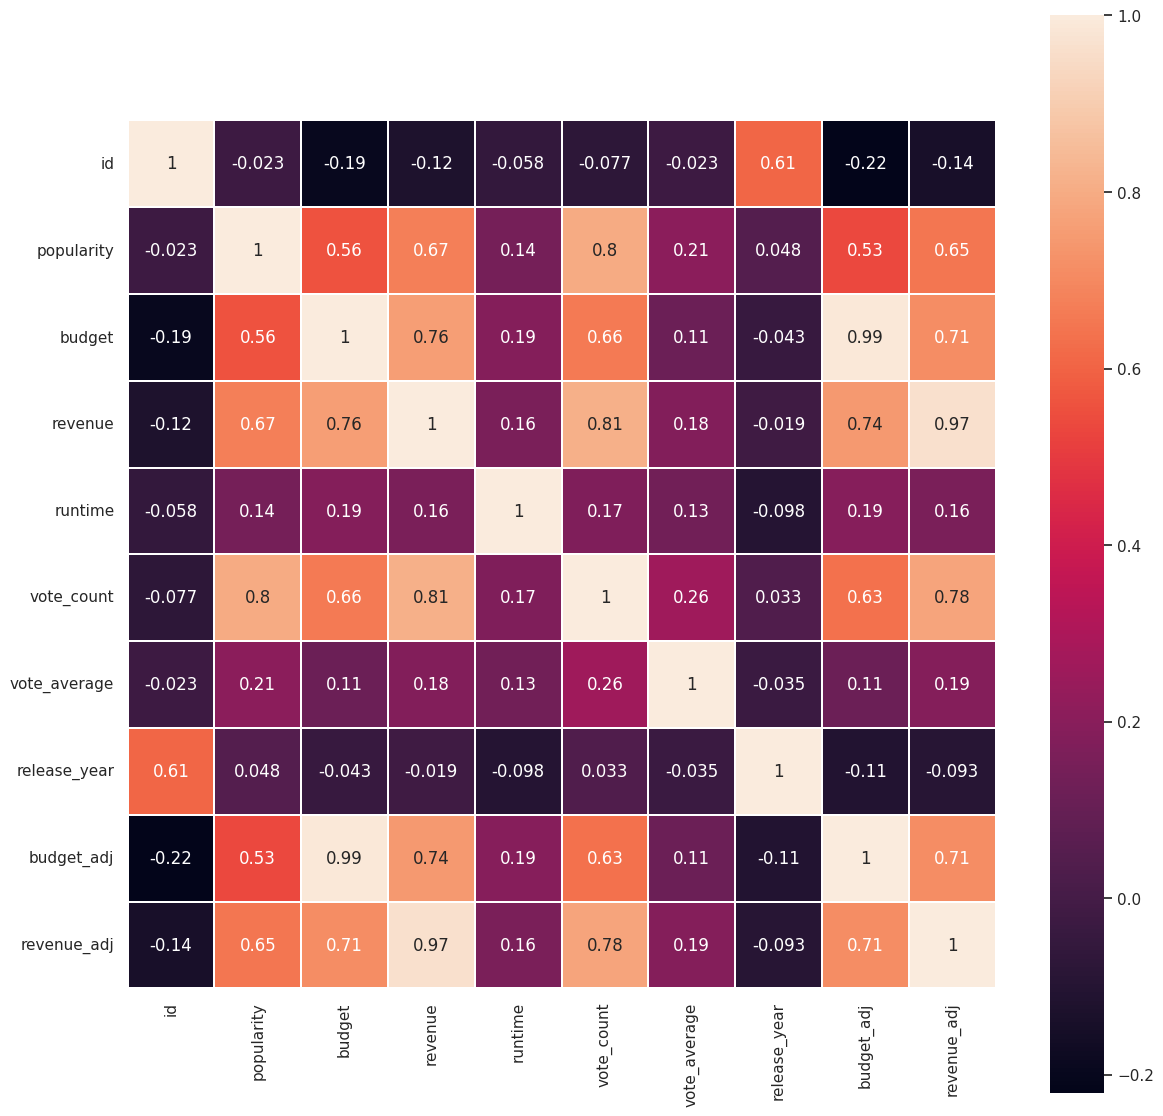

In [17]:
plt.figure(figsize=(14,14))
sns.heatmap(correlation,annot=True,linewidths=0.01,vmax=1,square=True,cbar=True);
?sns.heatmap

<Axes: >

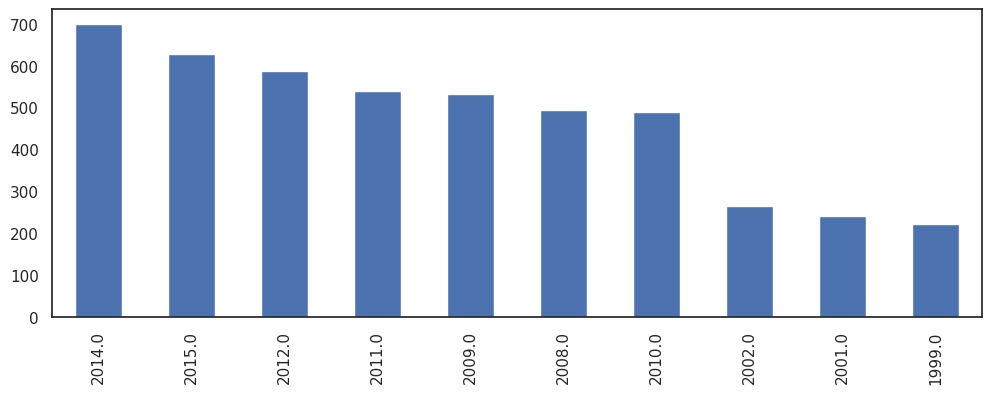

In [18]:
imdb_movies['release_year'].value_counts().head(10).plot.bar(figsize=(12,4))

<Axes: title={'center': 'budget'}, xlabel='vote_average'>

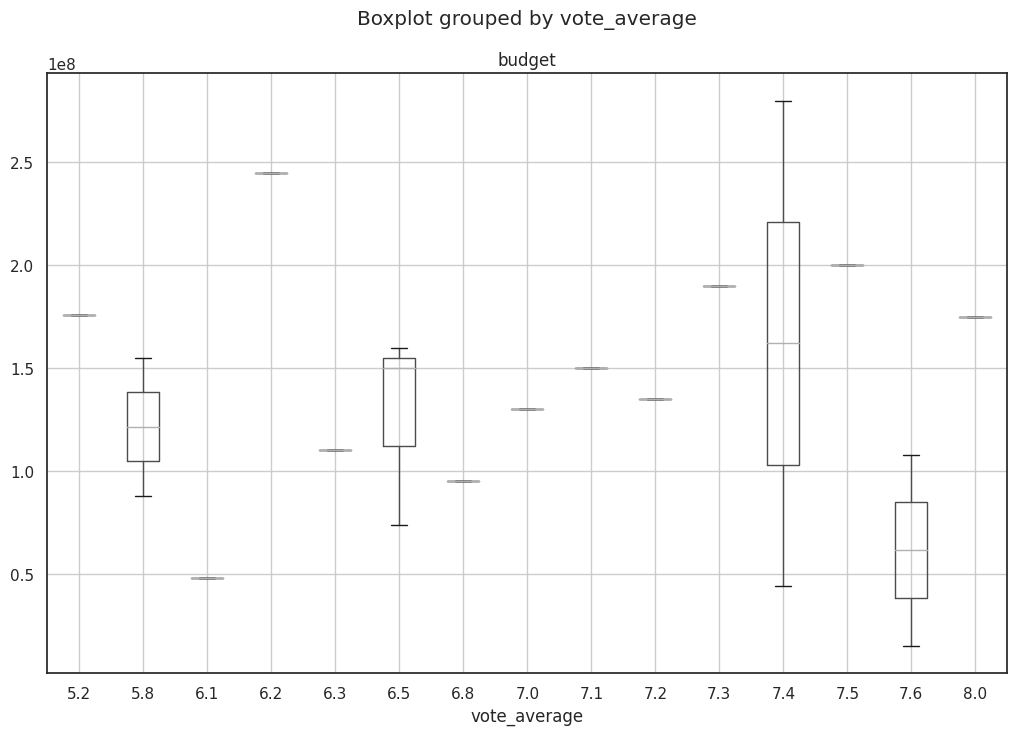

In [19]:
imdb_movies.head(20).boxplot(column='budget', by='vote_average',figsize=(12,8))

<Axes: title={'center': 'revenue'}, xlabel='budget'>

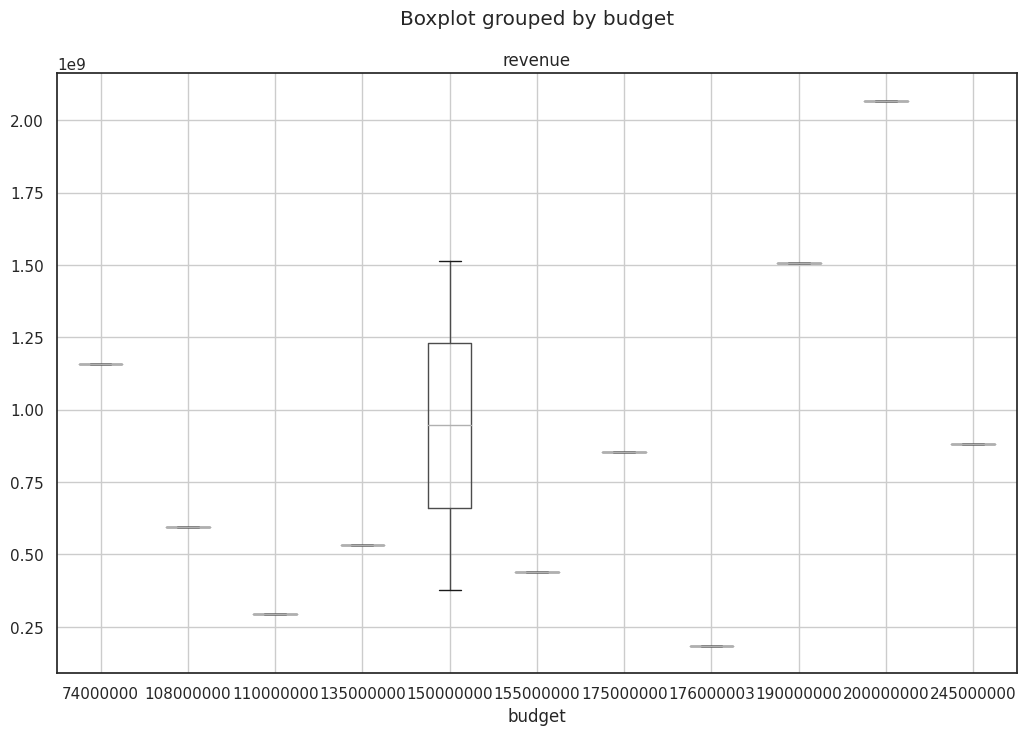

In [20]:
imdb_movies.head(12).boxplot(column='revenue',by='budget',figsize=(12,8))

In [22]:
imdb_movies['profit']=imdb_movies.revenue-imdb_movies.budget

<Axes: xlabel='original_title'>

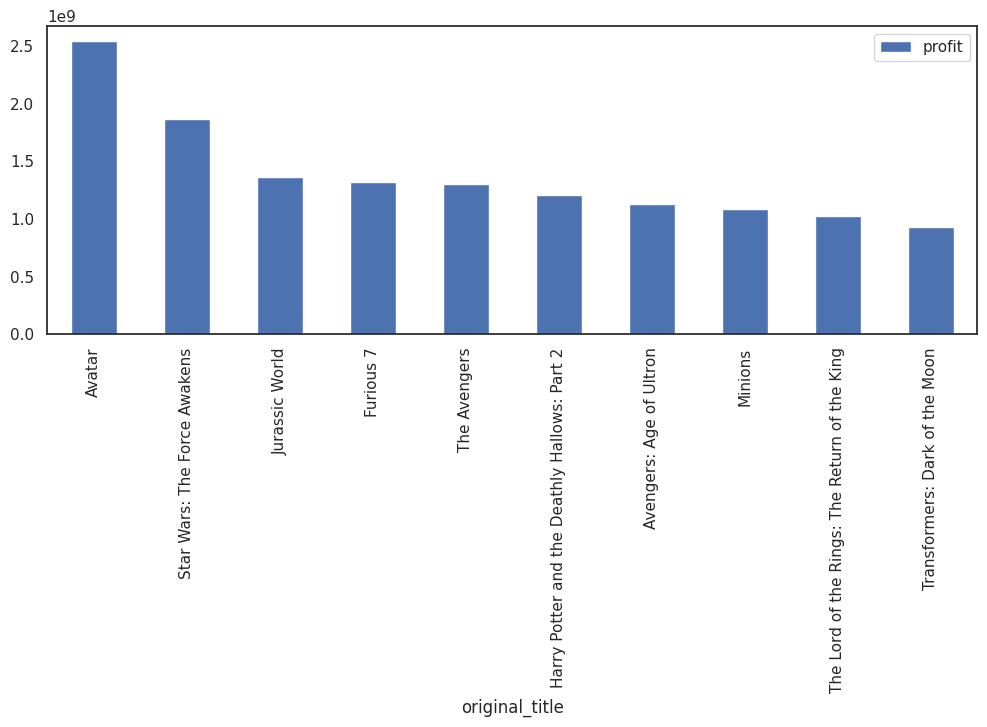

In [23]:
top10 = imdb_movies.nlargest(10,'profit')
top10.index = top10.original_title
top10[['original_title','profit']].plot.bar(figsize=(12,4))

<Axes: >

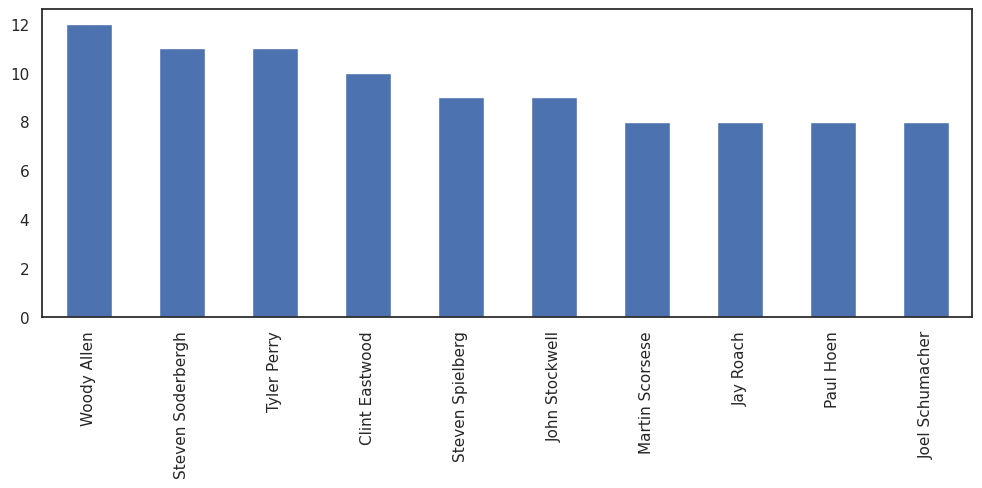

In [24]:
imdb_movies.director.value_counts().head(10).plot.bar(figsize=(12,4))

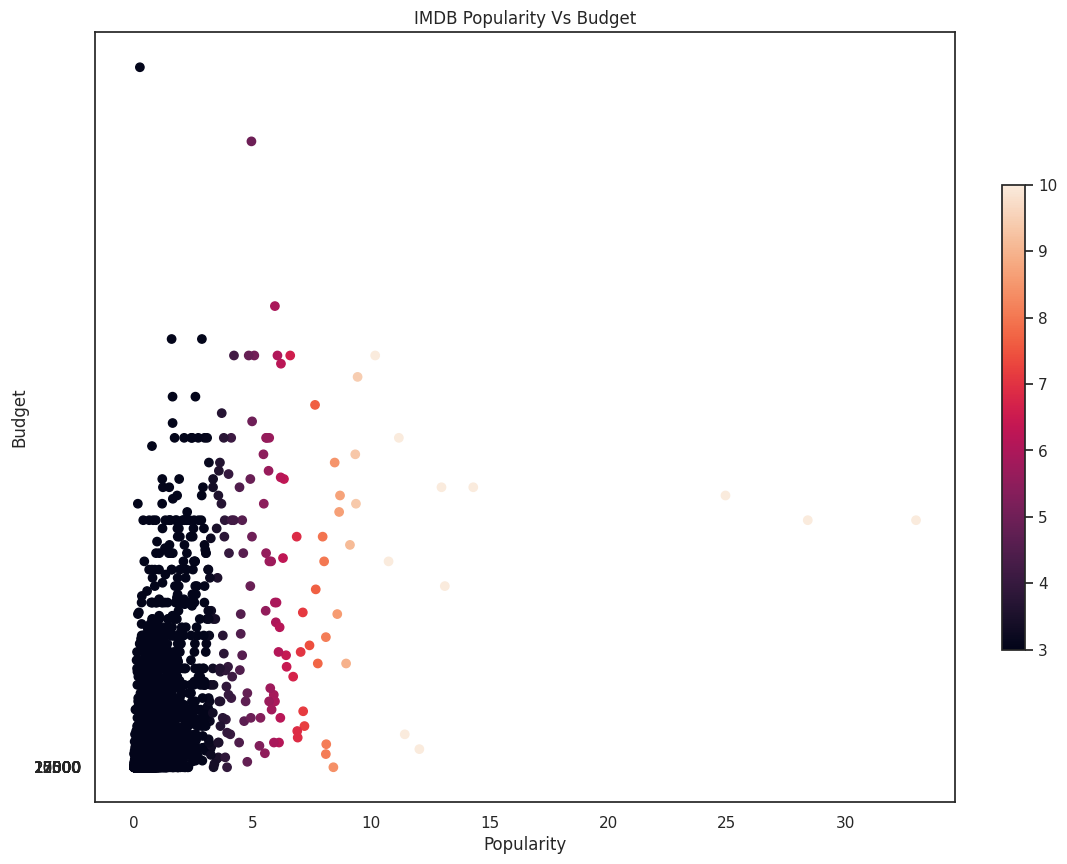

In [25]:
plt.figure(figsize=(12,10))
plt.title("IMDB Popularity Vs Budget")
plt.xlabel("Popularity")
plt.ylabel("Budget")
tmp=plt.scatter(imdb_movies.popularity,imdb_movies.budget,c=imdb_movies.popularity,vmin=3,vmax=10)
plt.yticks([i*2500 for i in range(11)])
plt.colorbar(tmp,fraction=.025)
plt.show()

In [26]:
top20ProfitMovies = imdb_movies.nlargest(20,'profit')

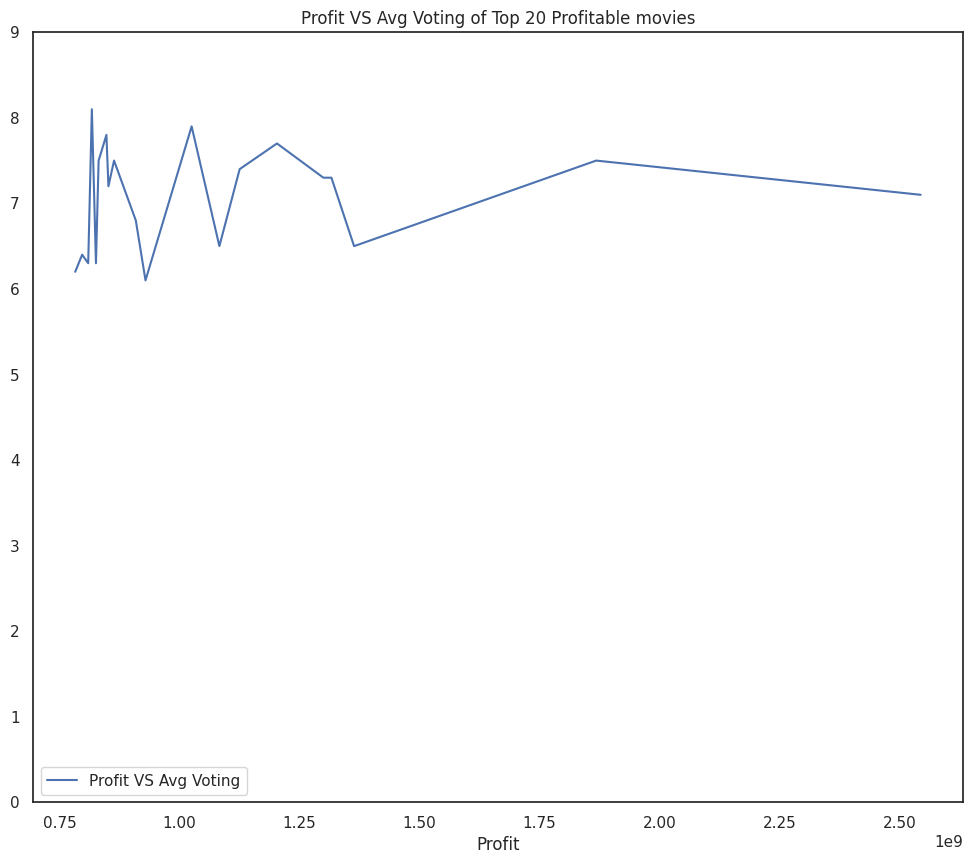

In [27]:
plt.figure(figsize=(12,10))
plt.title("Profit VS Avg Voting of Top 20 Profitable movies")
plt.xlabel('Profit')
plt.plot(top20ProfitMovies.profit,top20ProfitMovies.vote_average)
plt.legend(['Profit VS Avg Voting'],loc='lower left')
plt.yticks(range(10))
plt.show()

In [28]:
arrayGenres = []
for i in imdb_movies.genres:
    if type(i) == str:
        for x in i.split('|'):
            arrayGenres.append(x)

In [29]:
from collections import Counter
dicGenresWithCounts = Counter(arrayGenres)

Text(0, 0.5, 'No of movies released')

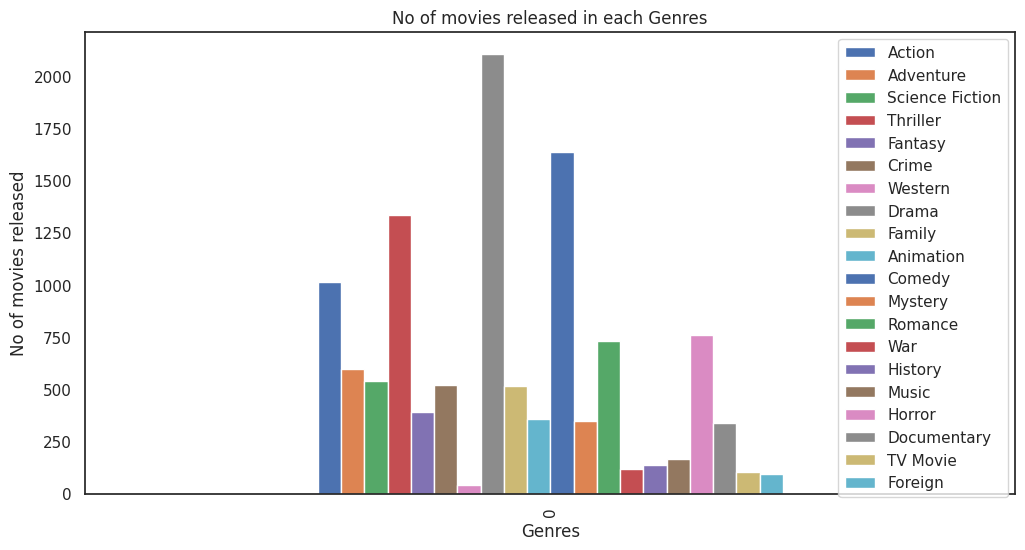

In [30]:
df=pd.DataFrame.from_dict([dicGenresWithCounts.values()])
df.columns=list(dicGenresWithCounts.keys())
df.plot.bar(figsize=(12,6))
plt.title("No of movies released in each Genres")
plt.xlabel("Genres")
plt.ylabel("No of movies released")

<Axes: ylabel='director'>

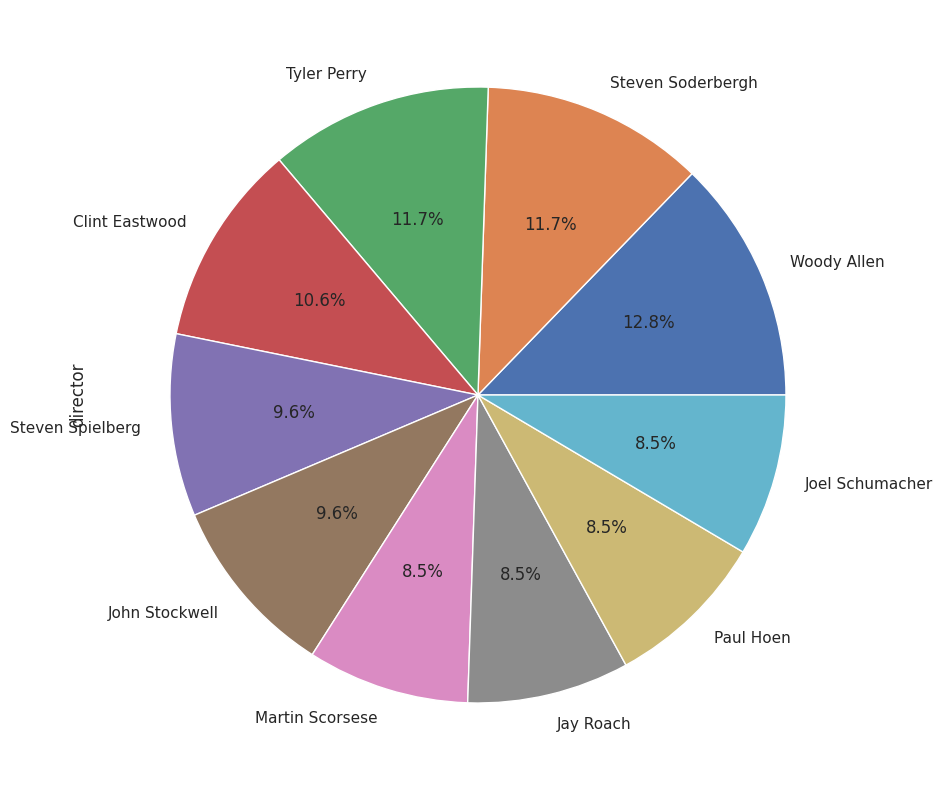

In [32]:
imdb_movies.director.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))

Text(0, 0.5, 'No of movies released')

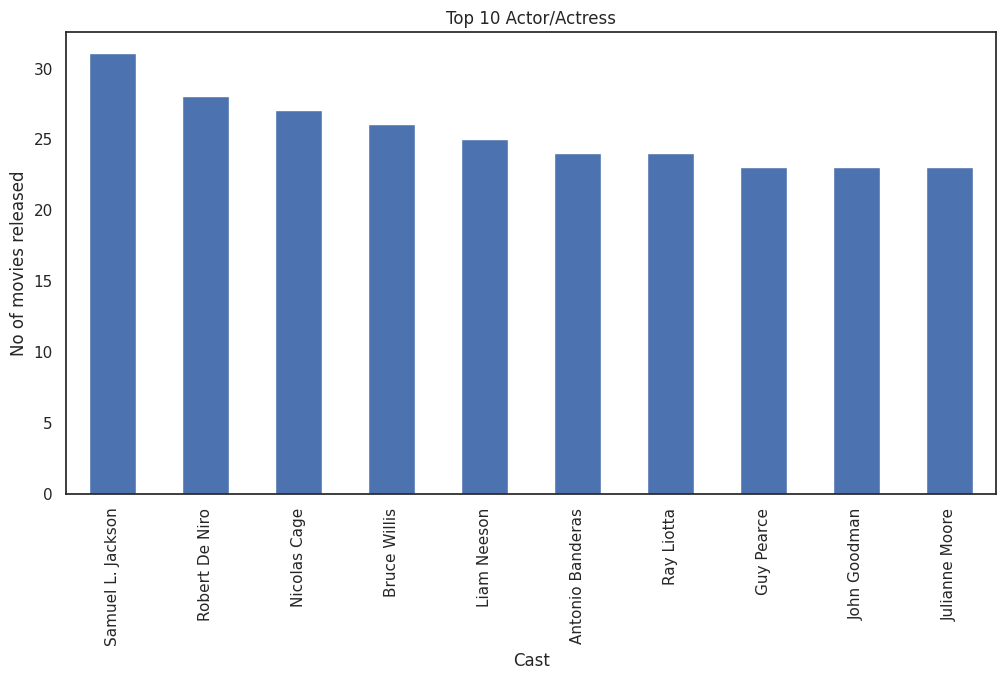

In [33]:
arrayCast = []
for i in imdb_movies.cast:
    if type(i) == str:
        for x in i.split('|'):
            arrayCast.append(x)
dicCastWithCounts = Counter(arrayCast)
df_Cast=pd.DataFrame(data={'Cast':list(dicCastWithCounts.keys()),'Count':list(dicCastWithCounts.values())}).sort_values(by='Count',ascending=False)
df_Cast.index = df_Cast.Cast
df_Cast.Count.head(10).plot.bar(figsize=(12,6))
plt.title("Top 10 Actor/Actress")
plt.xlabel("Cast")
plt.ylabel("No of movies released")

<Axes: ylabel='Count'>

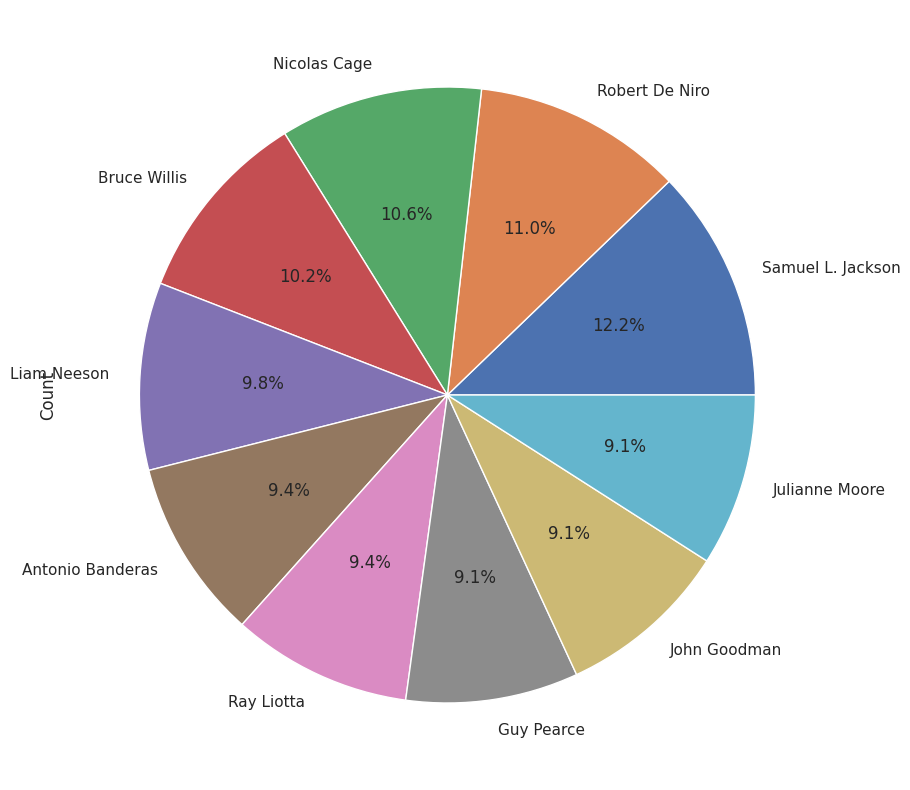

In [34]:
df_Cast.Count.head(10).plot.pie(autopct='%1.1f%%',figsize=(10,10))

In [35]:
imdb_movies['IsProfitable'] = imdb_movies.profit>(imdb_movies.budget*2)

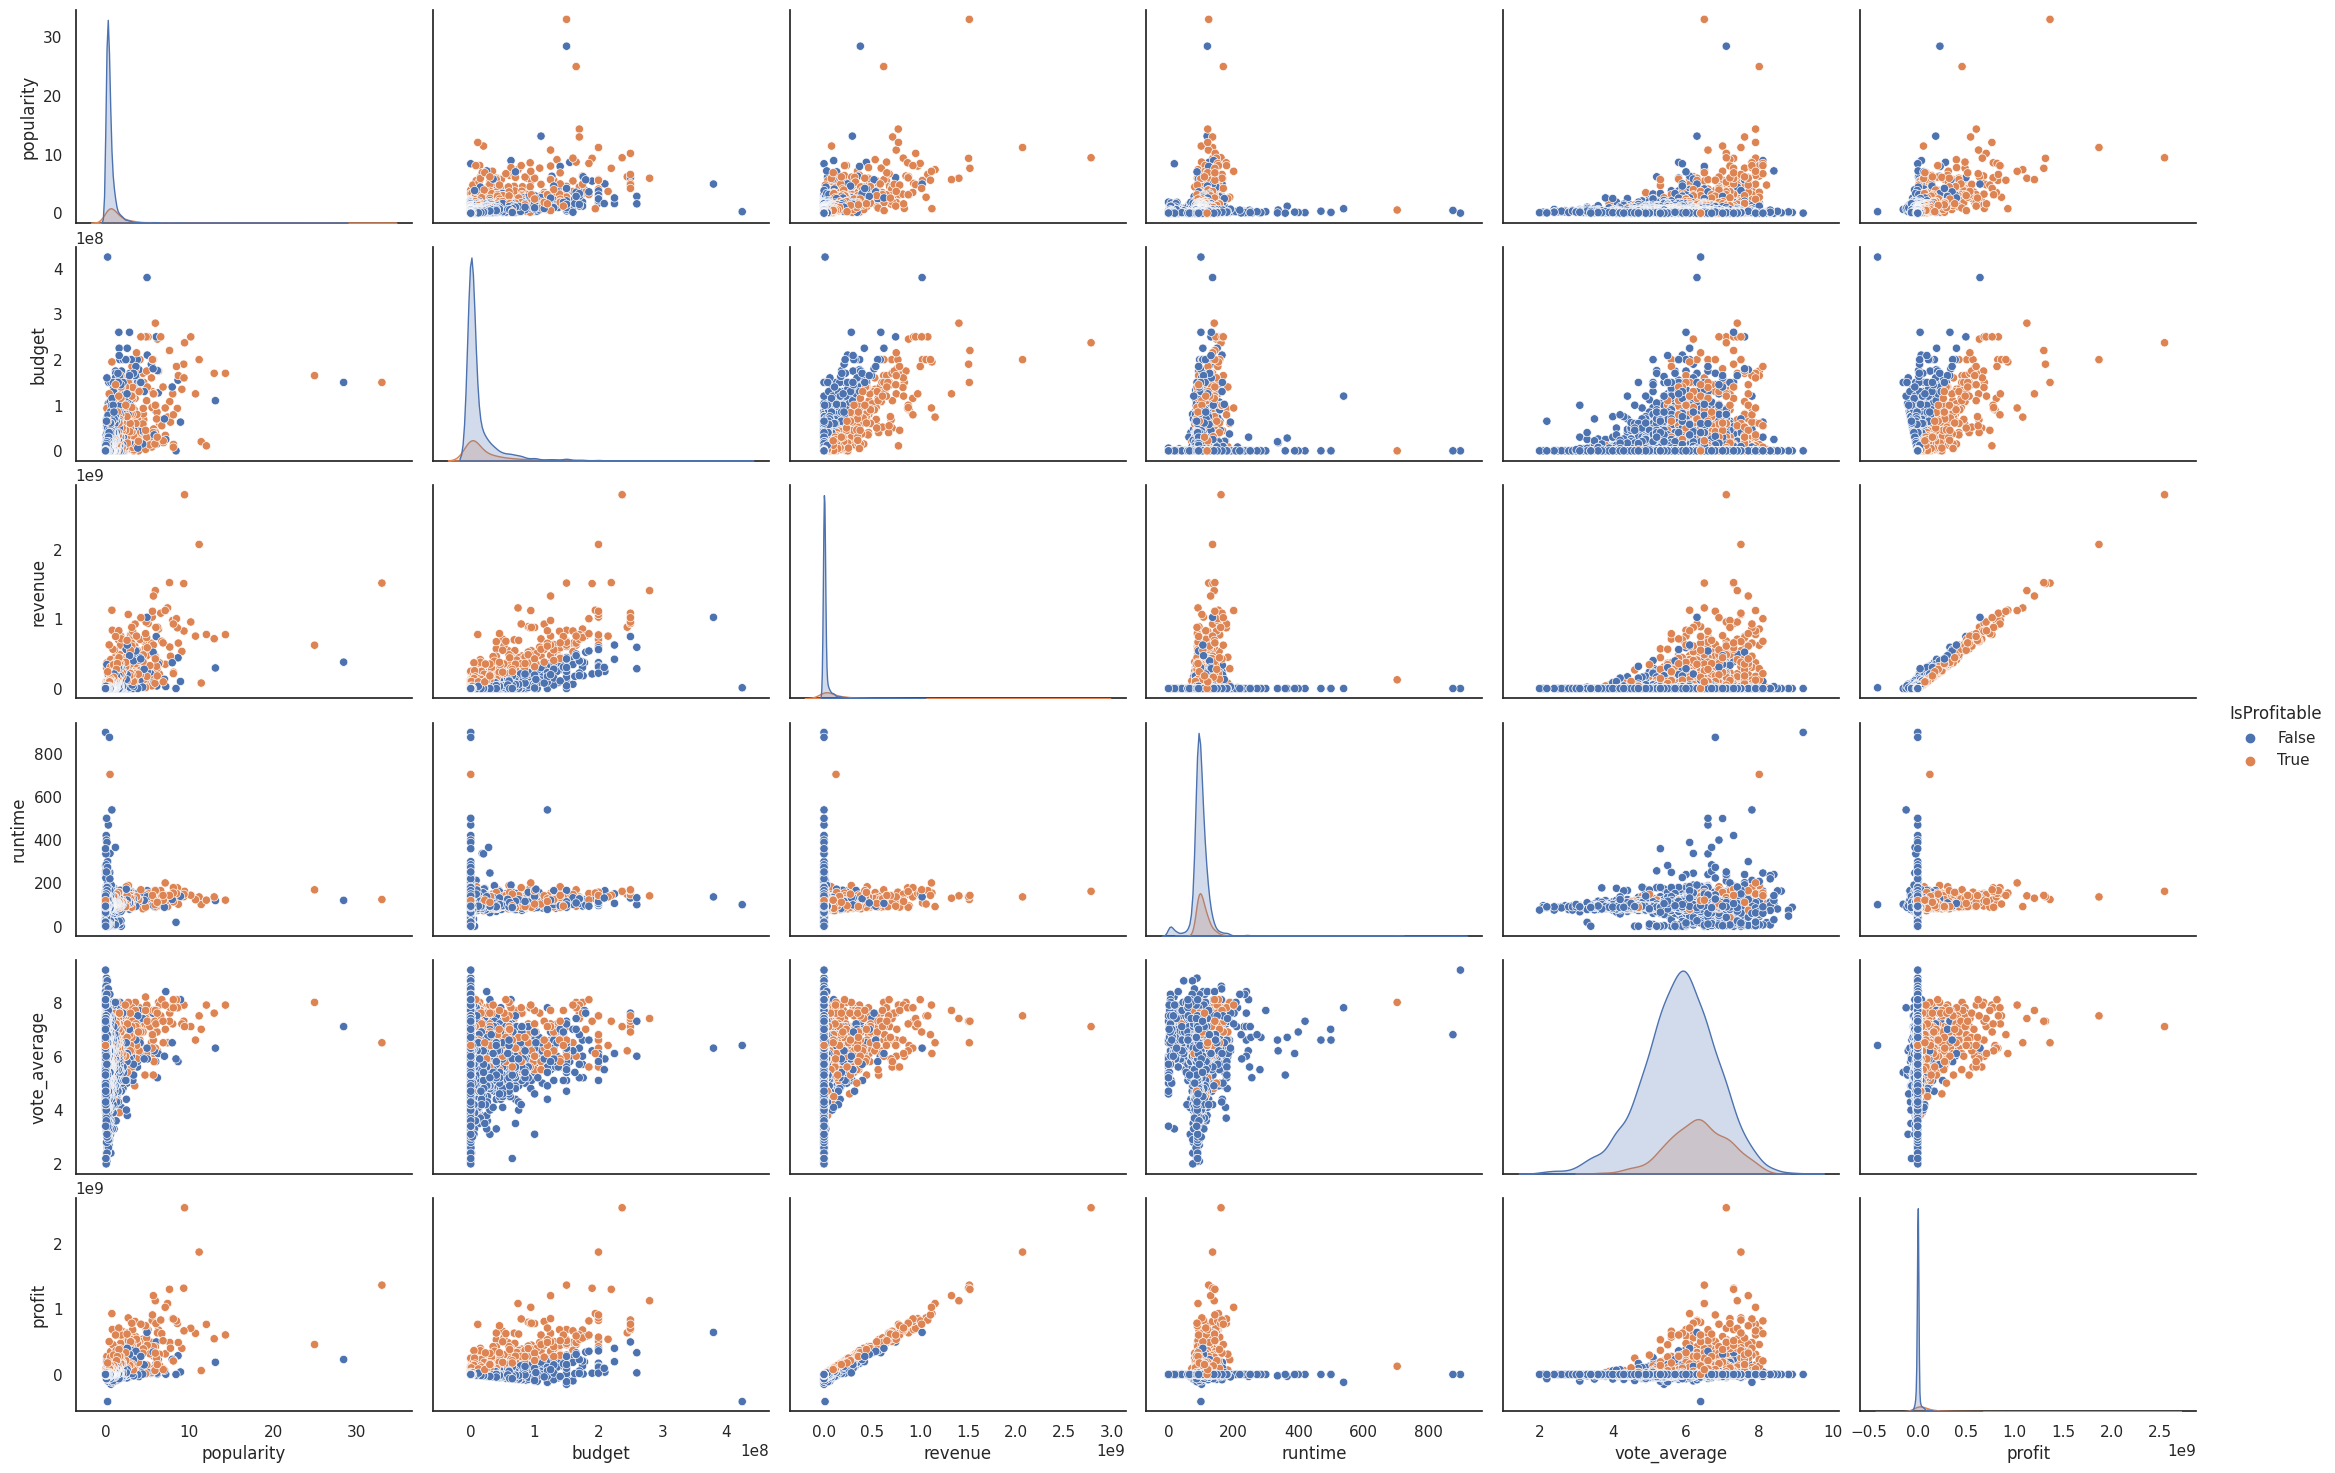

In [36]:
df_imp_data = imdb_movies.drop(['id','imdb_id','homepage', 'tagline','cast','keywords','overview','genres','production_companies','release_date','budget_adj','revenue_adj','release_year','original_title','vote_count','director'], axis=1)
df_imp_data
sns.pairplot(df_imp_data, hue='IsProfitable', aspect=1.5)
plt.show()